# **Exploratory Data Analysis & Class Imbalance Handling**

## **Amazon Product Review Sentiment Analysis**

### **Project Overview**
This project focuses on analyzing customer sentiments expressed in Amazon product reviews in the e-commerce domain. The dataset contains textual reviews and sentiment labels categorized as:

- Positive
- Negative
- Neutral

The primary objective is to understand review characteristics, detect class imbalance, and prepare the dataset for machine learning modeling.

### Goals of this Notebook
1. Load and understand the dataset
2. Perform Exploratory Data Analysis (EDA)
3. Visualize sentiment distribution
4. Identify class imbalance
5. Clean and preprocess text data
6. Prepare dataset for modeling

#### **IMPORTING LIBRARIES**

#### Import Required Libraries
We begin by importing all required libraries for data analysis and natural language processing.

In [ ]:
%pip install nltk
%pip install wordcloud
%pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\Aishwarya Kr
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### **LOAD DATASET**
We load the training dataset that will be used for model development.

In [23]:
df = pd.read_csv("../data/train_data.csv")
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [37]:
df.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment', 'review', 'clean_review', 'word_count', 'char_count'],
      dtype='object')

#### **DATASET INFO AND SHAPE**
We inspect number of rows, columns and data types.

In [38]:
df.shape

(4000, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        4000 non-null   object
 7   sentiment            4000 non-null   object
 8   review               4000 non-null   object
 9   clean_review         4000 non-null   object
 10  word_count           4000 non-null   int64 
 11  char_count           4000 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 375.1+ KB


#### **MISSING VALUES**
Missing textual reviews can negatively affect model performance.

In [40]:
df.isnull().sum()

Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
review                 0
clean_review           0
word_count             0
char_count             0
dtype: int64

#### **COMBINING TEXT COLUMNS**
Combining Review Title and Review Text
Both fields contain sentiment information, so we combine them.

In [ ]:
# Combine review title and review text
df["reviews.title"] = df["reviews.title"].fillna("").astype(str)
df["reviews.text"] = df["reviews.text"].fillna("").astype(str)

df["review"] = df["reviews.title"] + " " + df["reviews.text"]
df["review"].head()

0    Powerful tablet Purchased on Black FridayPros ...
1    Amazon Echo Plus AWESOME I purchased two Amazo...
2    Average Just an average Alexa option. Does sho...
3    Greattttttt very good product. Exactly what I ...
4    Very durable! This is the 3rd one I've purchas...
Name: review, dtype: object

In [65]:
df["sentiment"].value_counts()

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

#### **FEATURE CREATION**
Before we perform Exploratory Data Analysis, we will create useful analysis features

#### Feature Engineering for Analysis

To better understand customer behavior, we create additional features:

- Review Length (number of words)
- Character Length
These features help analyze whether negative customers write longer reviews.

In [71]:
df["word_count"] = df["review"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["review"].apply(lambda x: len(str(x)))

## **EXPLORATORY DATA ANALYSIS**
We will continue to do exploratory data analysis using different steps as shown below:

#### **UNIVARIATE ANALYSIS**
Inside Univariate analysis we will do the sentiment distribution annalysis by plotting the graph. Follow the steps below to proceed furhter.

#### **Sentiment Distribution**
We analyze how many Positive, Neutral and Negative reviews exist.

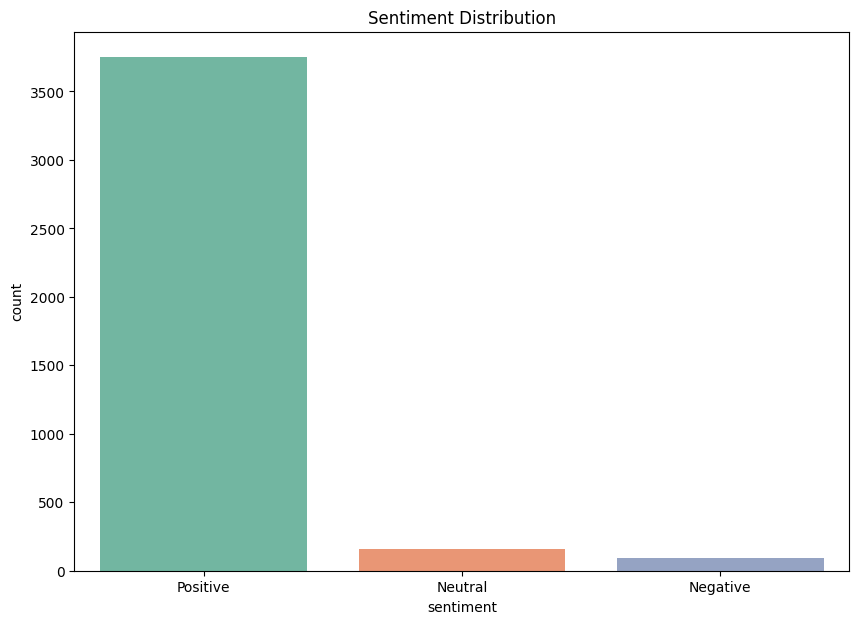

In [96]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["sentiment"], palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

#### **Top Brands**
We identify which brands receive the highest number of reviews.

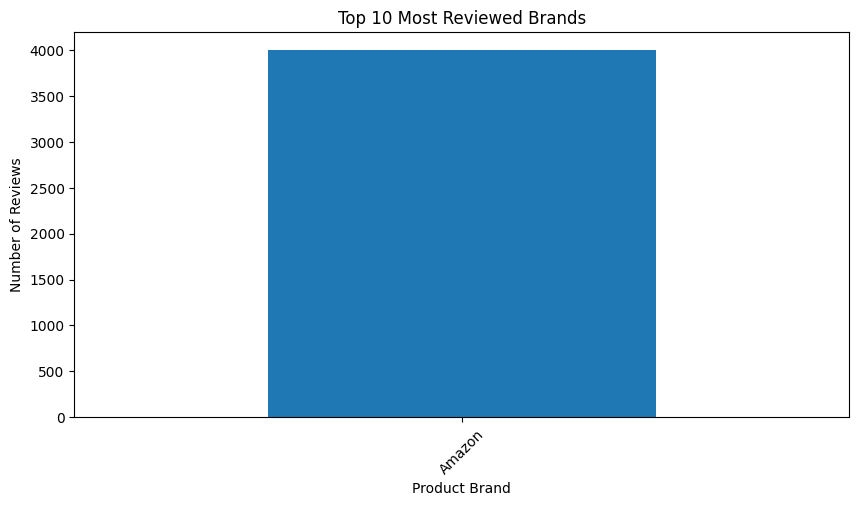

In [115]:
plt.figure(figsize=(10,5))
df["Product Brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Reviewed Brands")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

Since `train_data` only shows one product brand name, so above graph displays `Amazon` only. This might change once there are updated entries for the product brand. Program will not need to change in that case.

#### **Category Distribution**
We will get the details of the most reviewed categoty here

In [131]:
# Extract main category from categories
import re

def clean_category(x):
    x = str(x)

    # remove brackets and quotes
    x = re.sub(r"[\[\]\'\"]", "", x)

    # split by comma OR > OR |
    parts = re.split(r",|>|\\|/", x)

    # take the first meaningful category
    return parts[0].strip()

df["main_category"] = df["categories"].apply(clean_category)

#### Getting the unique categories from the `categories` feature 

In [132]:
df["main_category"].unique()[:20]

array(['Electronics', 'Amazon Echo', 'eBook Readers', 'Computers',
       'Office', 'Tablets', 'Fire Tablets', 'Kindle E-readers',
       'Computers & Tablets', 'Computers & Accessories', 'Amazon SMP'],
      dtype=object)

#### Top 10 categories

In [133]:
top_cat = df["main_category"].value_counts().head(10)
top_cat

main_category
Computers                  1408
Amazon Echo                 822
Electronics                 628
Fire Tablets                608
eBook Readers               171
Tablets                     158
Office                      135
Kindle E-readers             29
Computers & Accessories      20
Computers & Tablets          19
Name: count, dtype: int64

#### Plotting the top review categories to understand the real scenario

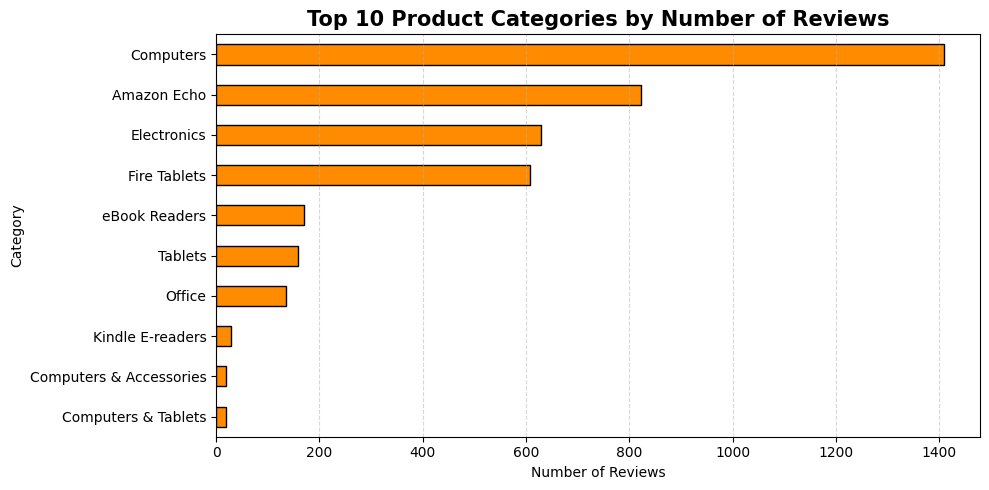

In [174]:
plt.figure(figsize=(10,5))

top_cat.sort_values().plot(
    kind="barh",
    color="#ff8c00",
    edgecolor="black"
)

plt.title("Top 10 Product Categories by Number of Reviews", fontsize=15, weight="bold")
plt.xlabel("Number of Reviews")
plt.ylabel("Category")

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

#### **Review Length Distribution**
This histogram shows how long customer reviews are

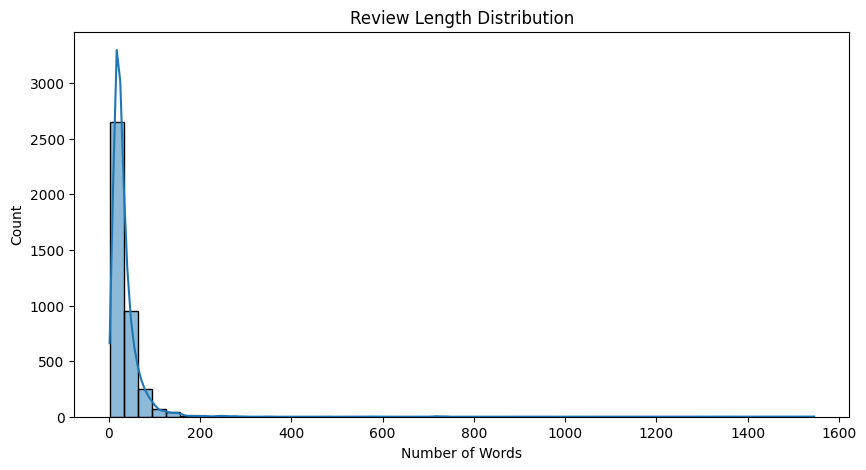

In [175]:
plt.figure(figsize=(10,5))
sns.histplot(df["word_count"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

#### **BIVARIATE ANALYSIS**

#### `Review Length` vs `Sentiment`

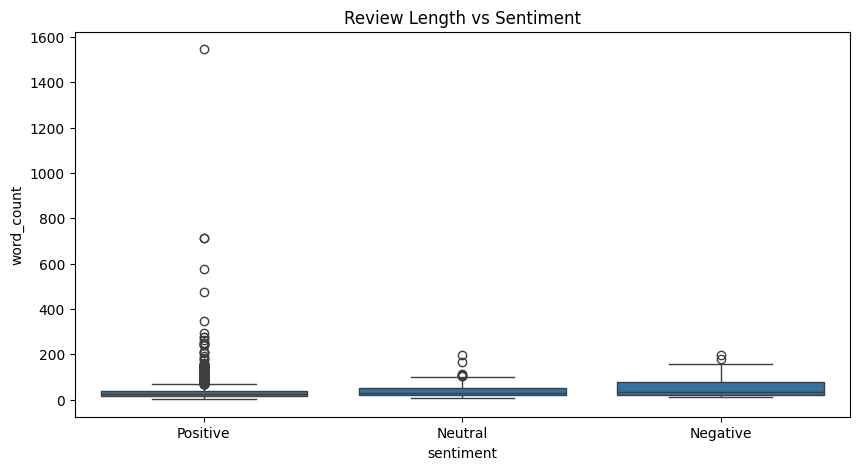

In [186]:
plt.figure(figsize=(10,5))
sns.boxplot(x="sentiment", y="word_count", data=df)
plt.title("Review Length vs Sentiment")
plt.show()

#### `Brand` vs `Sentiment`

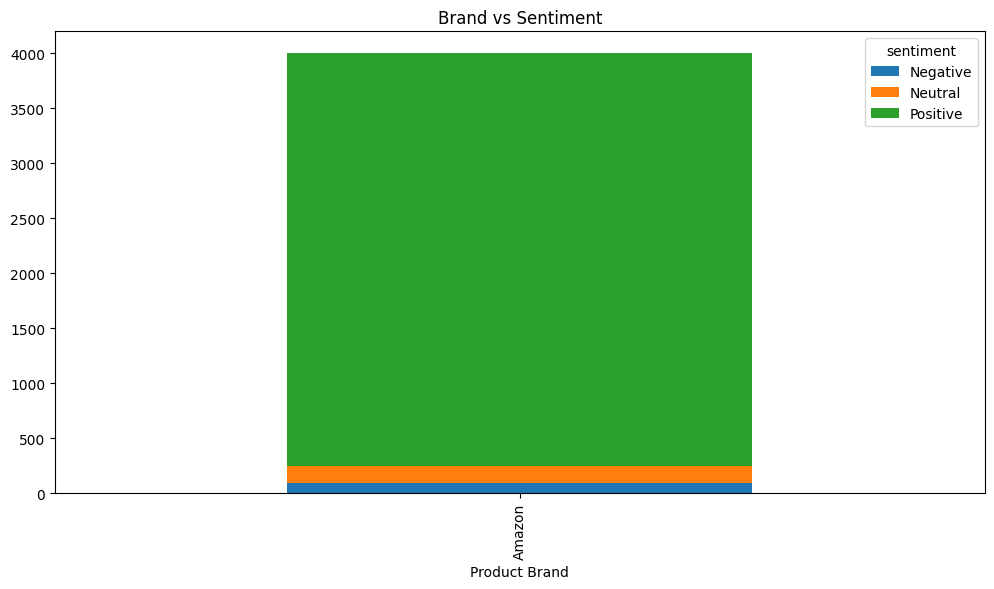

In [187]:
brand_sentiment = pd.crosstab(df["Product Brand"], df["sentiment"])
brand_sentiment.head(10).plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Brand vs Sentiment")
plt.show()

#### **MULTIVARIATE ANALYSIS**

#### Correlation Heatmap

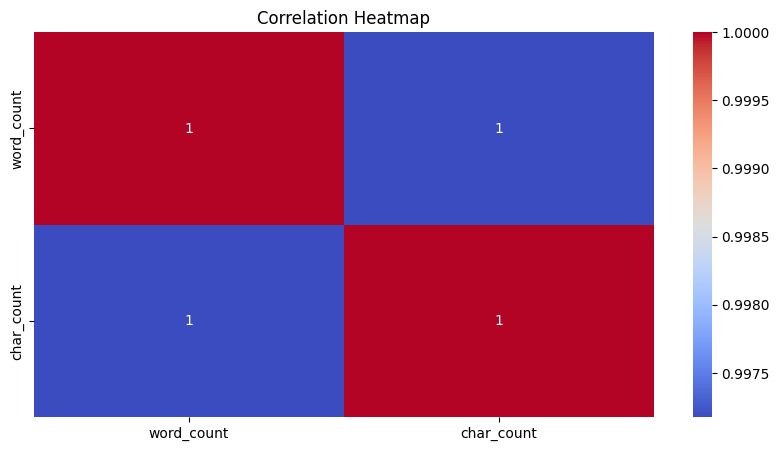

In [195]:
corr = df[["word_count","char_count"]].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### **CLASS IMBALANCE**
Here we will check the class imbalance to proceed furhter with the analysis

In [202]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)
df["clean_review"].head()

0    powerful tablet purchased black fridaypros gre...
1    amazon echo plus awesome purchased two amazon ...
2    average average alexa option show things scree...
3    greattttttt good product exactly wanted good p...
4    durable rd one purchased bought one nieces cas...
Name: clean_review, dtype: object

#### **WORDCLOUD**
`WordCloud Visualization`:
This shows the most frequent words appearing in reviews.

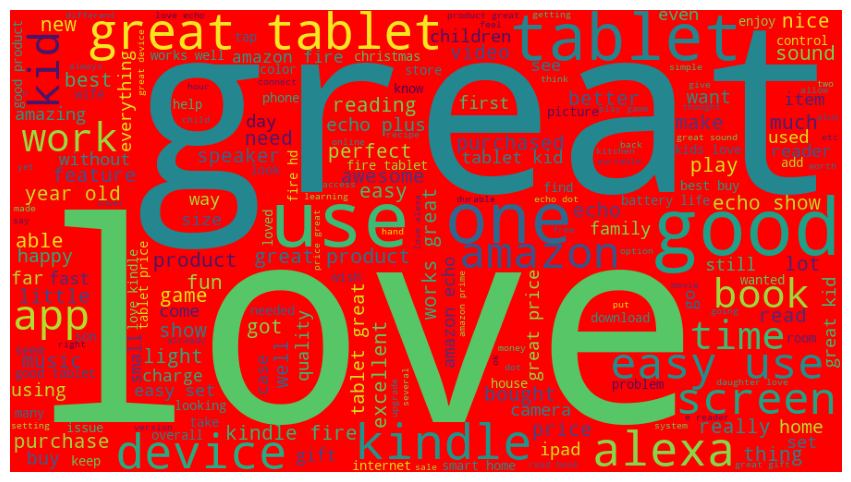

In [ ]:
text = " ".join(df["clean_review"])

wc = WordCloud(width=900, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### **HANDLING CLASS IMBALANCE**

#### Before oversampling

In [230]:
df["sentiment"].value_counts(normalize=True)*100

sentiment
Positive    93.725
Neutral      3.950
Negative     2.325
Name: proportion, dtype: float64

After Oversampling

Now, we will be handling class imbalance using `oversampling`

In [231]:
X = df[["clean_review"]]
y = df["sentiment"]

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

balanced_df = pd.concat([X_res, y_res], axis=1)
balanced_df["sentiment"].value_counts()

sentiment
Positive    3749
Neutral     3749
Negative    3749
Name: count, dtype: int64

#### **SAVE PROCESSED DATASET**

In [232]:
balanced_df.to_csv("../data/processed_train.csv", index=False)

#### ***Our notebook displays the following aspects:***
- Introduction
- Dataset Overview
- Univariate analysis
- Bivariate analysis
- Multivariate analysis
- Text analysis
- Class imbalance detection
- Data preprocessing
- Data balancing

Which fulfills the notebook 1 requirements. Next machine learning models will be created in noebook 2.